In [1]:
# Data Viz
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import titanic dataset from seaborn library
df=sns.load_dataset("titanic")

<Axes: xlabel='age', ylabel='fare'>

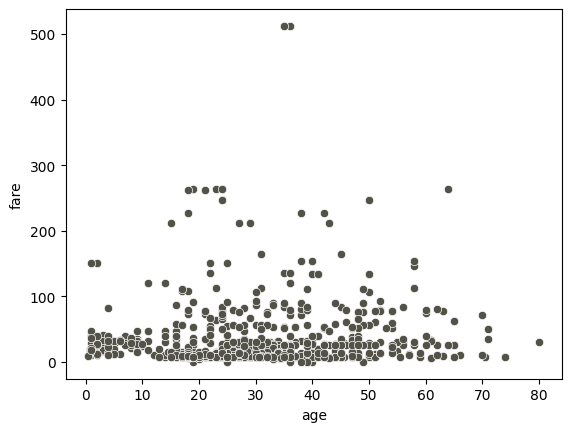

In [3]:
# show  scatter plot with age and fare
sns.scatterplot(x="age",y="fare",data=df, color="#535248")

<Axes: xlabel='sex', ylabel='age'>

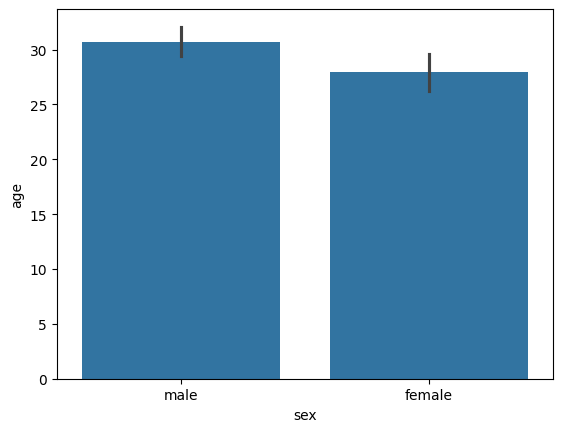

In [4]:
# do groupby sex and age based on mean
sns.barplot(x="sex",y="age",data=df,estimator=np.mean)

In [5]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# make scatter plot via plotly
import plotly.express as px
px.scatter(df,x="age",y="fare")


In [8]:
pip install skimage

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Import data
import time
import numpy as np

from skimage import io

vol = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")
volume = vol.T
r, c = volume[0].shape

# Define frames
import plotly.graph_objects as go
nb_frames = 68

fig = go.Figure(frames=[go.Frame(data=go.Surface(
    z=(6.7 - k * 0.1) * np.ones((r, c)),
    surfacecolor=np.flipud(volume[67 - k]),
    cmin=0, cmax=200
    ),
    name=str(k) # you need to name the frame for the animation to behave properly
    )
    for k in range(nb_frames)])

# Add data to be displayed before animation starts
fig.add_trace(go.Surface(
    z=6.7 * np.ones((r, c)),
    surfacecolor=np.flipud(volume[67]),
    colorscale='Gray',
    cmin=0, cmax=200,
    colorbar=dict(thickness=20, ticklen=4)
    ))


def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(0)],
                        "label": str(k),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig.frames)
                ],
            }
        ]

# Layout
fig.update_layout(
         title='Slices in volumetric data',
         width=600,
         height=600,
         scene=dict(
                    zaxis=dict(range=[-0.1, 6.8], autorange=False),
                    aspectratio=dict(x=1, y=1, z=1),
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders
)

fig.show()

ModuleNotFoundError: No module named 'skimage'